In [50]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
from datetime import timedelta
import numpy as np

## The Plan!
- Chemometrics: Use BMK data to train a Chemometrics model

## To get marks: 
1. **Plotting:** Creat nice looking plots. Increase the complexity of the plots without deacreasing the legibility
2. **PANDAS:** Use Pandas to read/write/manipulate the data
3. **NUMPY:** How would I use NUMPY for this? 
4. **DATETIME:** Use the datetime module in Python 
5. **Machine Learning and Regression:** Use Scikit learn and some sort of regression to answer a question.
6. **Increase the range of the data:** How would I do this?  
 
#### Example:
- How much wind power is there at a particular location?
    - This is quite open ended, is this just the mean wind speed for
an hour/day/month/year, or should you take into account that
there are wind ranges that the windfarms can operate in. (min
max speeds)
    - Some analysis of what power when would be useful (time of
day/year)
- Are the wind speeds likely to be the same in 10 years in the future? ie
is there a trend in recorded wind speeds over the last few decades.
- Is there any other weather metric worth analyzing (eg rain, temp)
- What will the power output of the windfarms in Ireland be like next
week, according to the weather forecasts?

In [3]:
reference_raman_spectra= pd.read_csv("Raw Raman Data - Reference.csv")
reference_raman_spectra

,RamanShift,0.625 mg/mL IgG1,1.25 mg/mL IgG1,2.5 mg/mL IgG1,5 mg/mL IgG1,10 mg/mL IgG1
0,3425,1.148563e+06,1.198166e+06,1.206326e+06,1.195576e+06,1.145207e+06
1,3424,1.147940e+06,1.200701e+06,1.209882e+06,1.200249e+06,1.143337e+06
2,3423,1.146370e+06,1.203749e+06,1.208789e+06,1.202838e+06,1.141522e+06
3,3422,1.146941e+06,1.207620e+06,1.206416e+06,1.204755e+06,1.142454e+06
4,3421,1.149270e+06,1.207037e+06,1.206871e+06,1.207519e+06,1.146455e+06
...,...,...,...,...,...,...
3321,104,3.753913e+05,3.963242e+05,4.022696e+05,4.083398e+05,4.052066e+05
3322,103,3.735581e+05,3.946033e+05,4.005288e+05,4.065235e+05,4.038400e+05
3323,102,3.714719e+05,3.924005e+05,3.982939e+05,4.041501e+05,4.020557e+05
3324,101,3.691386e+05,3.898265e+05,3.955637e+05,4.012652e+05,3.998573e+05


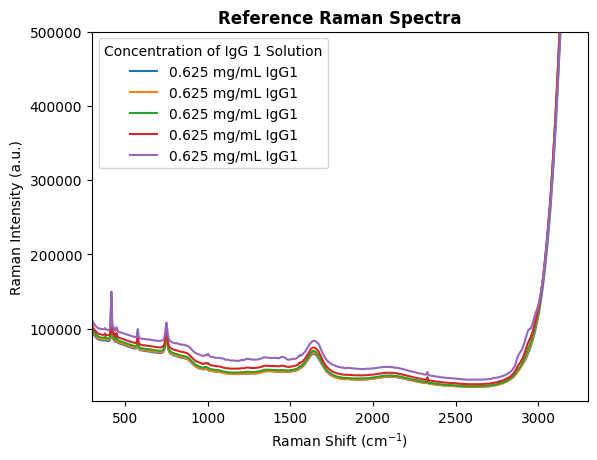

In [164]:
fig, ax = plt.subplots()
for i in reference_raman_spectra.columns[1:]:
    ax.plot(
        reference_raman_spectra["RamanShift"],
        reference_raman_spectra[i],
        label=f"{reference_raman_spectra.columns[1:][0]}"
    )
ax.set_xlim(300,3300)
ax.set_ylim(2500,0.5e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title("Reference Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend(title= "Concentration of IgG 1 Solution")

In [113]:
experimental_raman_spectra= pd.read_csv("Raw Raman Data - Experiment.csv").T #Header=0 doesn't work here as transposition of the csv being read in occurs after that argument is passed
experimental_raman_spectra.columns=experimental_raman_spectra.iloc[0].to_list() #Set the first row as the column header
experimental_raman_spectra.drop(index=experimental_raman_spectra.index[0], inplace=True) #Drop the first row


In [157]:
#Use timedelta to convert the data frame columns (1D array of  dtype='float64') to MM:SS

sampling_time = [timedelta(minutes=minutes) for minutes in experimental_raman_spectra.columns]
sampling_time_formatted = [f"{(time.seconds//60):02}:{(time.seconds%60):02}" for time in sampling_time]

In [165]:
#Generation of the x-axis 
wavenumbers = np.sort(np.array(experimental_raman_spectra.index, dtype=int))
# x_axis_ticks = np.linspace(np.min(wavenumbers), np.max(wavenumbers), 10)

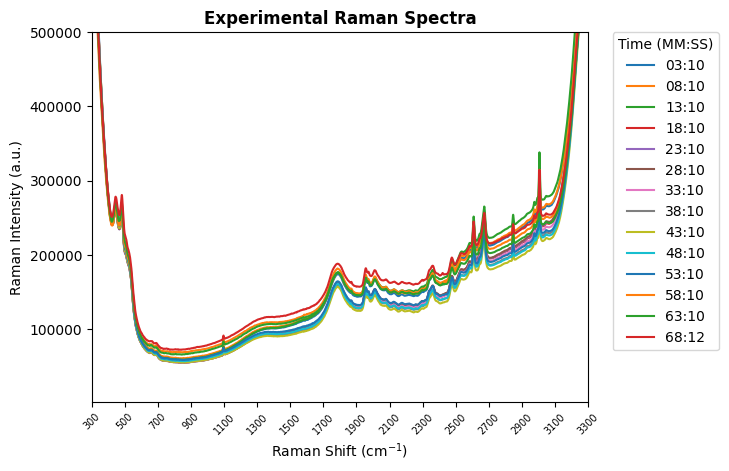

In [163]:
fig, ax = plt.subplots()

for column in experimental_raman_spectra:
    ax.plot(
        experimental_raman_spectra.index,
        experimental_raman_spectra[column],
        label=column
    )
ax.set_xticks(wavenumbers[::200])
ax.set_xticklabels(wavenumbers[::200], rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlim(300,3300)
ax.set_ylim(2500,0.5e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title("Experimental Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend(title= "Time (MM:SS)",
          labels= sampling_time_formatted,
          loc="upper left",
          bbox_to_anchor=(1.05, 1),
          borderaxespad=0
          )

To do:
- Set the xlim and ylim properly 
- Set the legende to be outside the plot
- Convert time to min and sec 

